# Redes neuronales en Keras: Fashion-MNIST

## Preparar los datos

In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
%matplotlib inline

2.0.0


In [7]:
# carga de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [10]:
print("train_images.shape: ", train_images.shape)
print("len(train_labels): ", len(train_labels))
print("test_images.shape: ", test_images.shape)
print("len(test_labels): ", len(test_labels))

train_images.shape:  (60000, 28, 28)
len(train_labels):  60000
test_images.shape:  (10000, 28, 28)
len(test_labels):  10000


In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

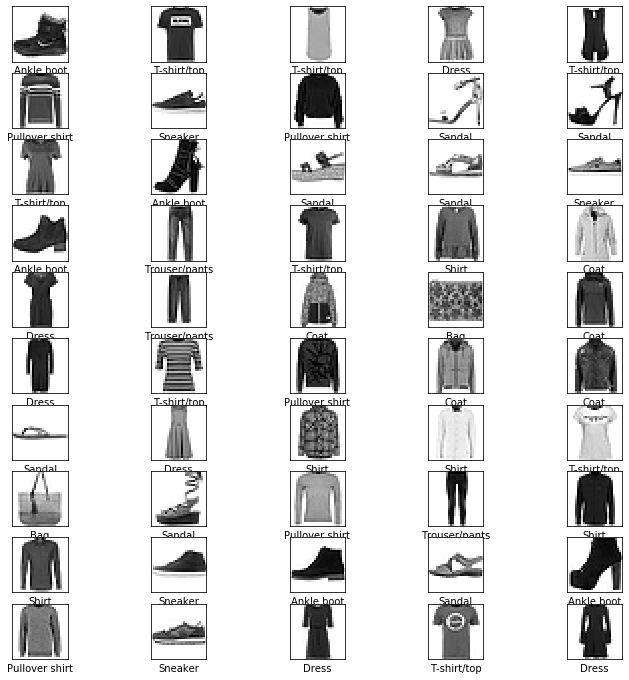

In [15]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Definir modelo

In [20]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### Configurar el modelo

In [23]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=[('accuracy')])

## Entrenamiento del modelo

In [25]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 1.8034 - accuracy: 0.4739
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 1.2663 - accuracy: 0.6131
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1.0379 - accuracy: 0.6691
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.9038 - accuracy: 0.7179
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8129 - accuracy: 0.7395
